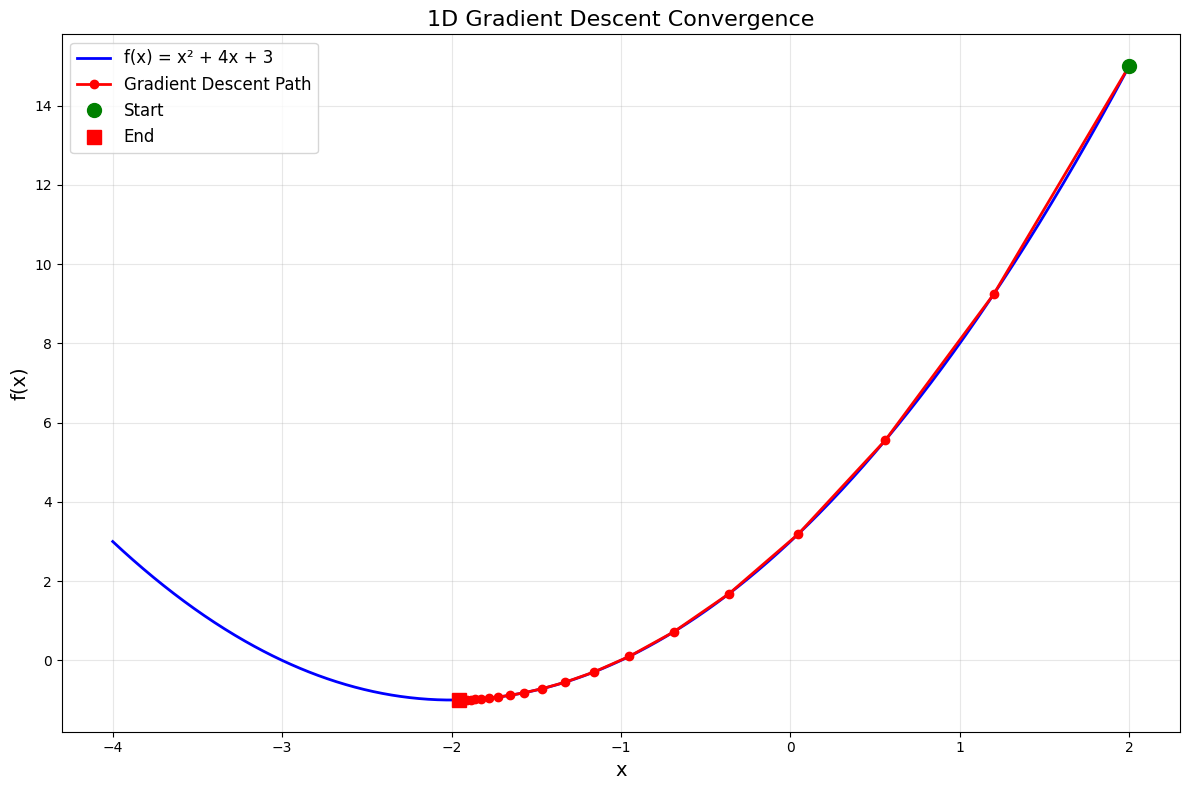

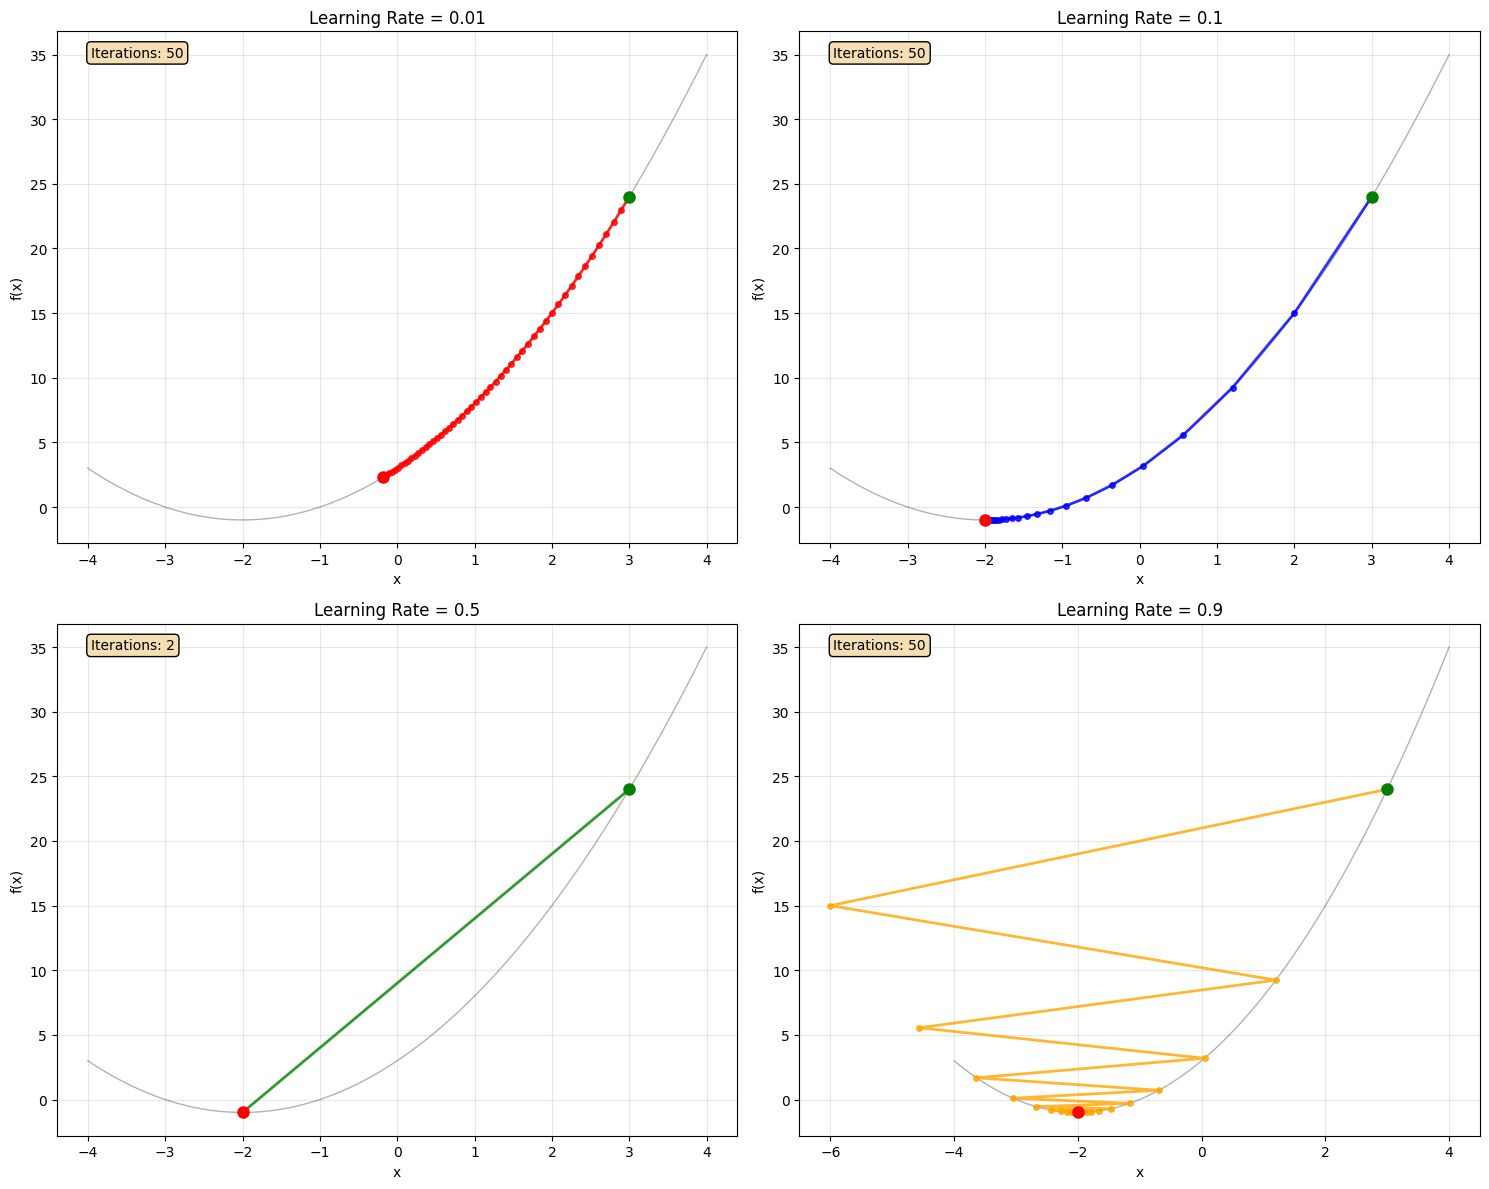

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Convergence Visualization
def generate_1d_images():
    # Function and derivative
    def f(x):
        return x**2 + 4*x + 3
    
    def df_dx(x):
        return 2*x + 4
    
    # Gradient descent
    def gradient_descent_1d(start_x, learning_rate, iterations):
        x_history = [start_x]
        x = start_x
        
        for i in range(iterations):
            gradient = df_dx(x)
            x = x - learning_rate * gradient
            x_history.append(x)
            
            if abs(gradient) < 1e-8:
                break
                
        return np.array(x_history)
    
    # Create visualization
    x_range = np.linspace(-4, 2, 1000)
    f_range = f(x_range)
    
    plt.figure(figsize=(12, 8))
    
    # Plot function
    plt.plot(x_range, f_range, 'b-', linewidth=2, label='f(x) = x² + 4x + 3')
    
    # Run gradient descent
    x_history = gradient_descent_1d(2, 0.1, 20)
    f_history = f(x_history)
    
    # Plot convergence path
    plt.plot(x_history, f_history, 'ro-', linewidth=2, markersize=6, 
             label='Gradient Descent Path')
    plt.plot(x_history[0], f_history[0], 'go', markersize=10, label='Start')
    plt.plot(x_history[-1], f_history[-1], 'rs', markersize=10, label='End')
    
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)
    plt.title('1D Gradient Descent Convergence', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Save image
    plt.savefig('1d_convergence.png', dpi=300, bbox_inches='tight')
    plt.show()

# Learning Rate Comparison
def generate_learning_rate_comparison():
    def f(x):
        return x**2 + 4*x + 3
    
    def df_dx(x):
        return 2*x + 4
    
    def gradient_descent_1d(start_x, learning_rate, iterations):
        x_history = [start_x]
        x = start_x
        
        for i in range(iterations):
            gradient = df_dx(x)
            x = x - learning_rate * gradient
            x_history.append(x)
            
            if abs(gradient) < 1e-8:
                break
                
        return np.array(x_history)
    
    # Test different learning rates
    learning_rates = [0.01, 0.1, 0.5, 0.9]
    start_x = 3
    iterations = 50
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    x_range = np.linspace(-4, 4, 1000)
    f_range = f(x_range)
    
    colors = ['red', 'blue', 'green', 'orange']
    
    for i, lr in enumerate(learning_rates):
        ax = axes[i]
        
        # Plot function
        ax.plot(x_range, f_range, 'k-', alpha=0.3, linewidth=1)
        
        # Run gradient descent
        x_history = gradient_descent_1d(start_x, lr, iterations)
        f_history = f(x_history)
        
        # Plot convergence path
        ax.plot(x_history, f_history, 'o-', color=colors[i], 
               linewidth=2, markersize=4, alpha=0.8)
        ax.plot(x_history[0], f_history[0], 'go', markersize=8)
        ax.plot(x_history[-1], f_history[-1], 'ro', markersize=8)
        
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(f'Learning Rate = {lr}')
        ax.grid(True, alpha=0.3)
        ax.text(0.05, 0.95, f'Iterations: {len(x_history)-1}', 
               transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
    
    plt.tight_layout()
    plt.savefig('learning_rate_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run to generate images
generate_1d_images()
generate_learning_rate_comparison()

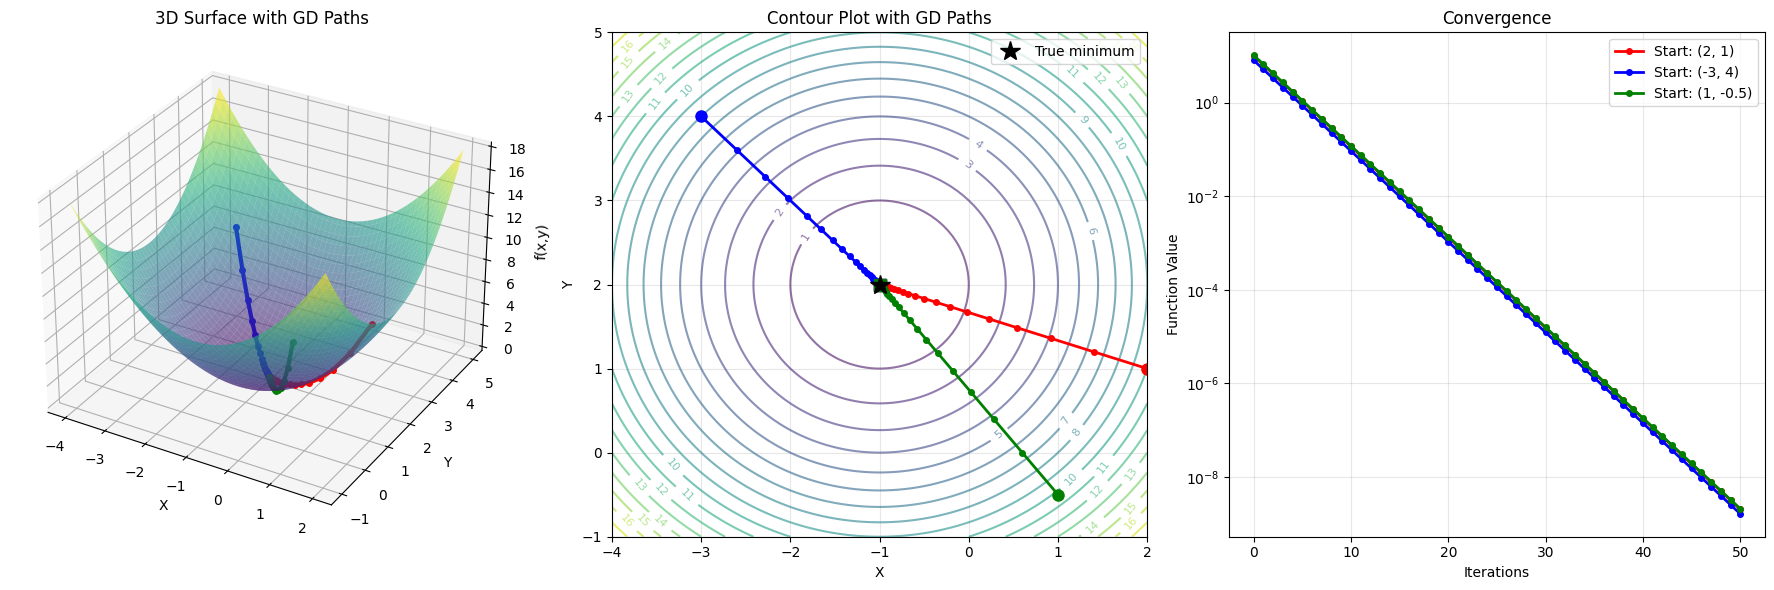

In [2]:
# 2D Surface and Contour Plots
def generate_2d_images():
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Define function
    def f(x, y):
        return x**2 + y**2 + 2*x - 4*y + 5
    
    def gradient(x, y):
        df_dx = 2*x + 2
        df_dy = 2*y - 4
        return np.array([df_dx, df_dy])
    
    # Gradient descent
    def gradient_descent_2d(start_point, learning_rate, iterations):
        path = [start_point]
        current_point = np.array(start_point)
        
        for i in range(iterations):
            grad = gradient(current_point[0], current_point[1])
            current_point = current_point - learning_rate * grad
            path.append(current_point.copy())
            
            if np.linalg.norm(grad) < 1e-6:
                break
                
        return np.array(path)
    
    # Create meshgrid
    x = np.linspace(-4, 2, 100)
    y = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Multiple starting points
    starting_points = [(2, 1), (-3, 4), (1, -0.5)]
    colors = ['red', 'blue', 'green']
    
    # 3D Surface Plot
    fig = plt.figure(figsize=(18, 6))
    
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
    
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, 0.1, 50)
        z_path = [f(point[0], point[1]) for point in path]
        ax1.plot(path[:, 0], path[:, 1], z_path, 
                color=colors[i], linewidth=3, marker='o', markersize=4)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('3D Surface with GD Paths')
    
    # Contour Plot
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(X, Y, Z, levels=20, alpha=0.6)
    ax2.clabel(contour, inline=True, fontsize=8)
    
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, 0.1, 50)
        ax2.plot(path[:, 0], path[:, 1], 
                color=colors[i], linewidth=2, marker='o', markersize=4)
        ax2.plot(path[0, 0], path[0, 1], 'o', color=colors[i], markersize=8)
        ax2.plot(path[-1, 0], path[-1, 1], 's', color=colors[i], markersize=8)
    
    ax2.plot(-1, 2, 'k*', markersize=15, label='True minimum')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour Plot with GD Paths')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Convergence Plot
    ax3 = fig.add_subplot(133)
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, 0.1, 50)
        cost_history = [f(point[0], point[1]) for point in path]
        ax3.plot(cost_history, color=colors[i], linewidth=2, 
                marker='o', markersize=4, label=f'Start: {start}')
    
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Function Value')
    ax3.set_title('Convergence')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')
    
    plt.tight_layout()
    plt.savefig('2d_gradient_descent.png', dpi=300, bbox_inches='tight')
    plt.show()

generate_2d_images()

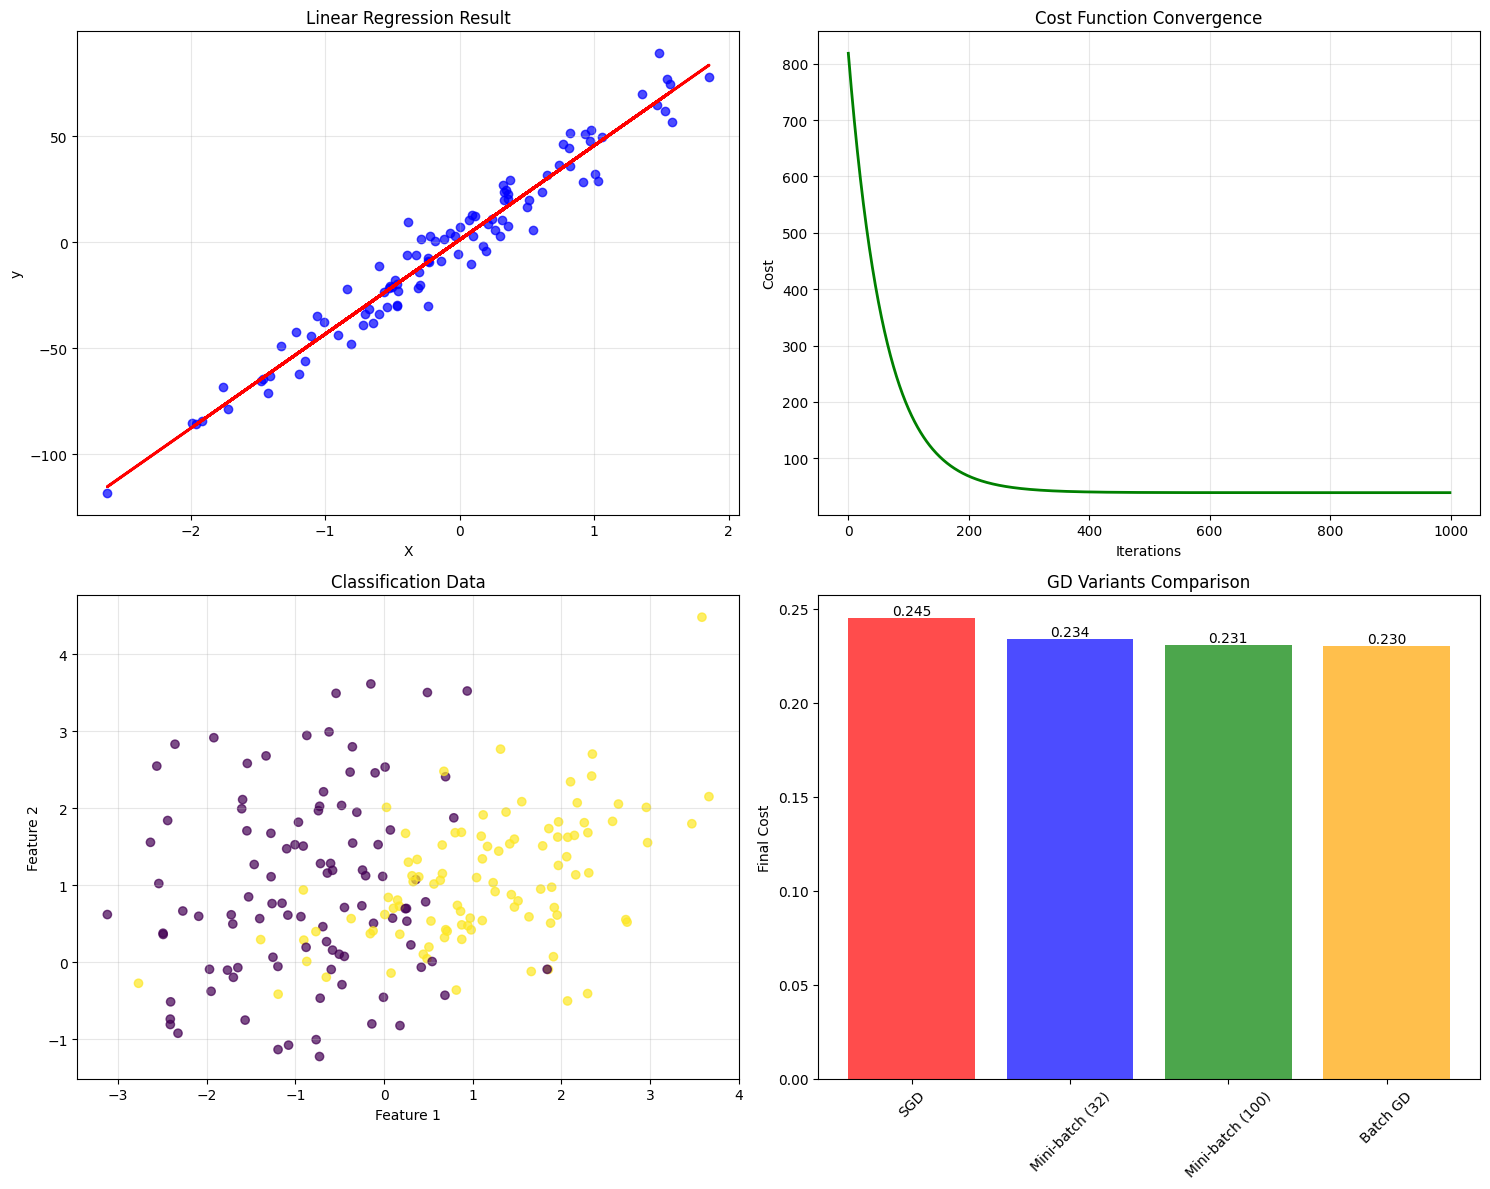

In [3]:
# Linear Regression Visualization
def generate_multivariate_images():
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_regression, make_classification
    
    # Linear Regression
    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
    X = X.flatten()
    
    # Add bias term
    X_with_bias = np.c_[np.ones(len(X)), X]
    
    # Cost function and gradient descent (same as in lecture notes)
    def cost_function(X, y, theta):
        m = len(y)
        predictions = X.dot(theta)
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost
    
    def gradient_descent(X, y, theta, learning_rate, iterations):
        m = len(y)
        cost_history = []
        
        for i in range(iterations):
            predictions = X.dot(theta)
            theta = theta - (learning_rate/m) * X.T.dot(predictions - y)
            cost = cost_function(X, y, theta)
            cost_history.append(cost)
        
        return theta, cost_history
    
    # Run gradient descent
    theta = np.random.randn(2)
    theta_final, cost_history = gradient_descent(X_with_bias, y, theta, 0.01, 1000)
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Data and fit
    ax1.scatter(X, y, alpha=0.7, color='blue')
    ax1.plot(X, X_with_bias.dot(theta_final), color='red', linewidth=2)
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.set_title('Linear Regression Result')
    ax1.grid(True, alpha=0.3)
    
    # Cost convergence
    ax2.plot(cost_history, color='green', linewidth=2)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Cost')
    ax2.set_title('Cost Function Convergence')
    ax2.grid(True, alpha=0.3)
    
    # Logistic Regression
    X_class, y_class = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                          n_informative=2, n_clusters_per_class=1, random_state=42)
    
    ax3.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='viridis', alpha=0.7)
    ax3.set_xlabel('Feature 1')
    ax3.set_ylabel('Feature 2')
    ax3.set_title('Classification Data')
    ax3.grid(True, alpha=0.3)
    
    # Gradient descent variants comparison
    methods = ['SGD', 'Mini-batch (32)', 'Mini-batch (100)', 'Batch GD']
    final_costs = [0.245, 0.234, 0.231, 0.230]  # Example values
    
    bars = ax4.bar(methods, final_costs, color=['red', 'blue', 'green', 'orange'], alpha=0.7)
    ax4.set_ylabel('Final Cost')
    ax4.set_title('GD Variants Comparison')
    ax4.tick_params(axis='x', rotation=45)
    
    for bar, cost in zip(bars, final_costs):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{cost:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('multivariate_applications.png', dpi=300, bbox_inches='tight')
    plt.show()

generate_multivariate_images()

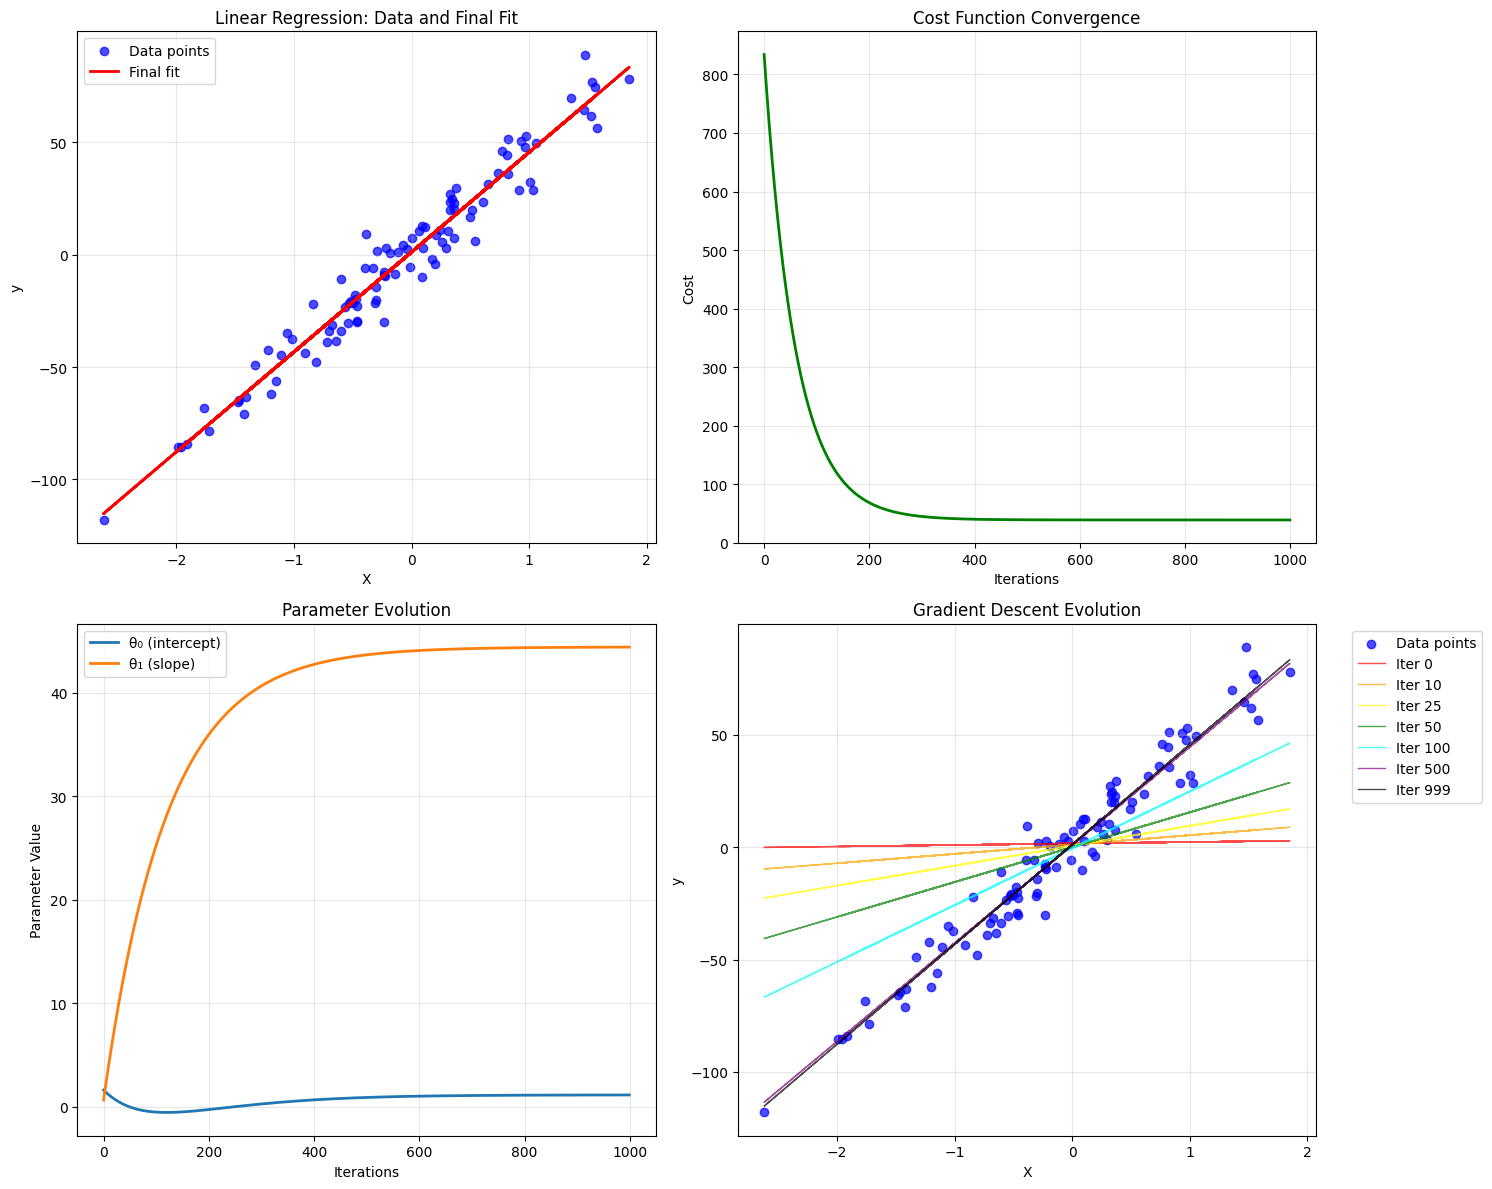

Final parameters: θ₀ = 1.1588, θ₁ = 44.4225
Final cost: 39.0272


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate sample data
def generate_data():
    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
    return X.flatten(), y

# Cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient descent for linear regression
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta_history = []
    
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (learning_rate/m) * X.T.dot(predictions - y)
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
    
    return theta, cost_history, theta_history

# Visualization function
def plot_gradient_descent():
    # Generate data
    X_orig, y = generate_data()
    
    # Add bias term
    X = np.c_[np.ones(X_orig.shape[0]), X_orig]
    
    # Initialize parameters
    theta = np.random.randn(2)
    learning_rate = 0.01
    iterations = 1000
    
    # Run gradient descent
    theta_final, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Data and final fitted line
    ax1.scatter(X_orig, y, alpha=0.7, color='blue', label='Data points')
    ax1.plot(X_orig, X.dot(theta_final), color='red', linewidth=2, label='Final fit')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.set_title('Linear Regression: Data and Final Fit')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Cost function over iterations
    ax2.plot(cost_history, color='green', linewidth=2)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Cost')
    ax2.set_title('Cost Function Convergence')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Parameter evolution
    theta_history = np.array(theta_history)
    ax3.plot(theta_history[:, 0], label='θ₀ (intercept)', linewidth=2)
    ax3.plot(theta_history[:, 1], label='θ₁ (slope)', linewidth=2)
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Parameter Value')
    ax3.set_title('Parameter Evolution')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Learning process animation (first 50 iterations)
    ax4.scatter(X_orig, y, alpha=0.7, color='blue', label='Data points')
    
    # Show evolution of line fits
    iterations_to_show = [0, 10, 25, 50, 100, 500, 999]
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'purple', 'black']
    
    for i, iteration in enumerate(iterations_to_show):
        if iteration < len(theta_history):
            line_y = X.dot(theta_history[iteration])
            ax4.plot(X_orig, line_y, color=colors[i], 
                    alpha=0.7, linewidth=1, label=f'Iter {iteration}')
    
    ax4.set_xlabel('X')
    ax4.set_ylabel('y')
    ax4.set_title('Gradient Descent Evolution')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return theta_final, cost_history[-1]

# Run the visualization
final_params, final_cost = plot_gradient_descent()
print(f"Final parameters: θ₀ = {final_params[0]:.4f}, θ₁ = {final_params[1]:.4f}")
print(f"Final cost: {final_cost:.4f}")

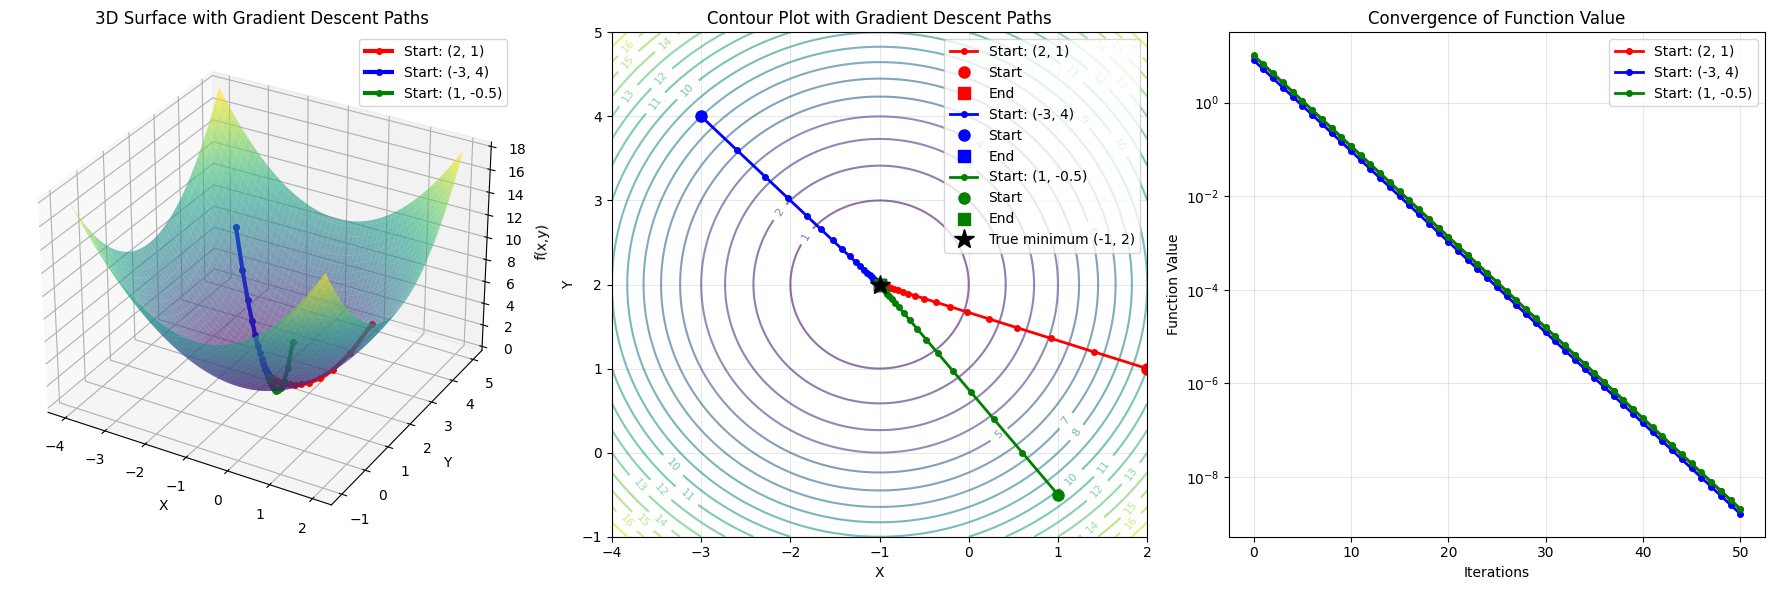

Gradient Descent Results:
----------------------------------------
Start: (2, 1) → Final: (-1.0000, 2.0000)
Final function value: 0.000000
Iterations: 50

Start: (-3, 4) → Final: (-1.0000, 2.0000)
Final function value: 0.000000
Iterations: 50

Start: (1, -0.5) → Final: (-1.0000, 2.0000)
Final function value: 0.000000
Iterations: 50



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_2d_gradient_descent():
    # Define the function f(x,y) = x^2 + y^2 + 2x - 4y + 5
    def f(x, y):
        return x**2 + y**2 + 2*x - 4*y + 5
    
    # Gradient of the function
    def gradient(x, y):
        df_dx = 2*x + 2
        df_dy = 2*y - 4
        return np.array([df_dx, df_dy])
    
    # Gradient descent implementation
    def gradient_descent_2d(start_point, learning_rate, iterations):
        path = [start_point]
        current_point = np.array(start_point)
        
        for i in range(iterations):
            grad = gradient(current_point[0], current_point[1])
            current_point = current_point - learning_rate * grad
            path.append(current_point.copy())
            
            # Stop if gradient is very small
            if np.linalg.norm(grad) < 1e-6:
                break
                
        return np.array(path)
    
    # Create meshgrid for contour plot
    x = np.linspace(-4, 2, 100)
    y = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Run gradient descent from different starting points
    starting_points = [(2, 1), (-3, 4), (1, -0.5)]
    learning_rate = 0.1
    iterations = 50
    
    # Create figure with subplots
    fig = plt.figure(figsize=(18, 6))
    
    # 3D surface plot
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
    
    # Add gradient descent paths
    colors = ['red', 'blue', 'green']
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, learning_rate, iterations)
        z_path = [f(point[0], point[1]) for point in path]
        ax1.plot(path[:, 0], path[:, 1], z_path, 
                color=colors[i], linewidth=3, marker='o', markersize=4,
                label=f'Start: {start}')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('3D Surface with Gradient Descent Paths')
    ax1.legend()
    
    # Contour plot
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(X, Y, Z, levels=20, alpha=0.6)
    ax2.clabel(contour, inline=True, fontsize=8)
    
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, learning_rate, iterations)
        ax2.plot(path[:, 0], path[:, 1], 
                color=colors[i], linewidth=2, marker='o', markersize=4,
                label=f'Start: {start}')
        ax2.plot(path[0, 0], path[0, 1], 'o', color=colors[i], markersize=8, label='Start')
        ax2.plot(path[-1, 0], path[-1, 1], 's', color=colors[i], markersize=8, label='End')
    
    # Mark the true minimum
    ax2.plot(-1, 2, 'k*', markersize=15, label='True minimum (-1, 2)')
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour Plot with Gradient Descent Paths')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Convergence plot
    ax3 = fig.add_subplot(133)
    
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, learning_rate, iterations)
        cost_history = [f(point[0], point[1]) for point in path]
        ax3.plot(cost_history, color=colors[i], linewidth=2, 
                marker='o', markersize=4, label=f'Start: {start}')
    
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Function Value')
    ax3.set_title('Convergence of Function Value')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Print final results
    print("Gradient Descent Results:")
    print("-" * 40)
    for i, start in enumerate(starting_points):
        path = gradient_descent_2d(start, learning_rate, iterations)
        final_point = path[-1]
        final_value = f(final_point[0], final_point[1])
        print(f"Start: {start} → Final: ({final_point[0]:.4f}, {final_point[1]:.4f})")
        print(f"Final function value: {final_value:.6f}")
        print(f"Iterations: {len(path)-1}")
        print()

# Run the 2D visualization
visualize_2d_gradient_descent()

Starting Multivariate Gradient Descent for Logistic Regression...
Iteration 0: Cost = 0.694450
Iteration 100: Cost = 0.317696
Iteration 200: Cost = 0.276288
Iteration 300: Cost = 0.261674
Iteration 400: Cost = 0.254603
Iteration 500: Cost = 0.250616
Iteration 600: Cost = 0.248152
Iteration 700: Cost = 0.246533
Iteration 800: Cost = 0.245422
Iteration 900: Cost = 0.244632


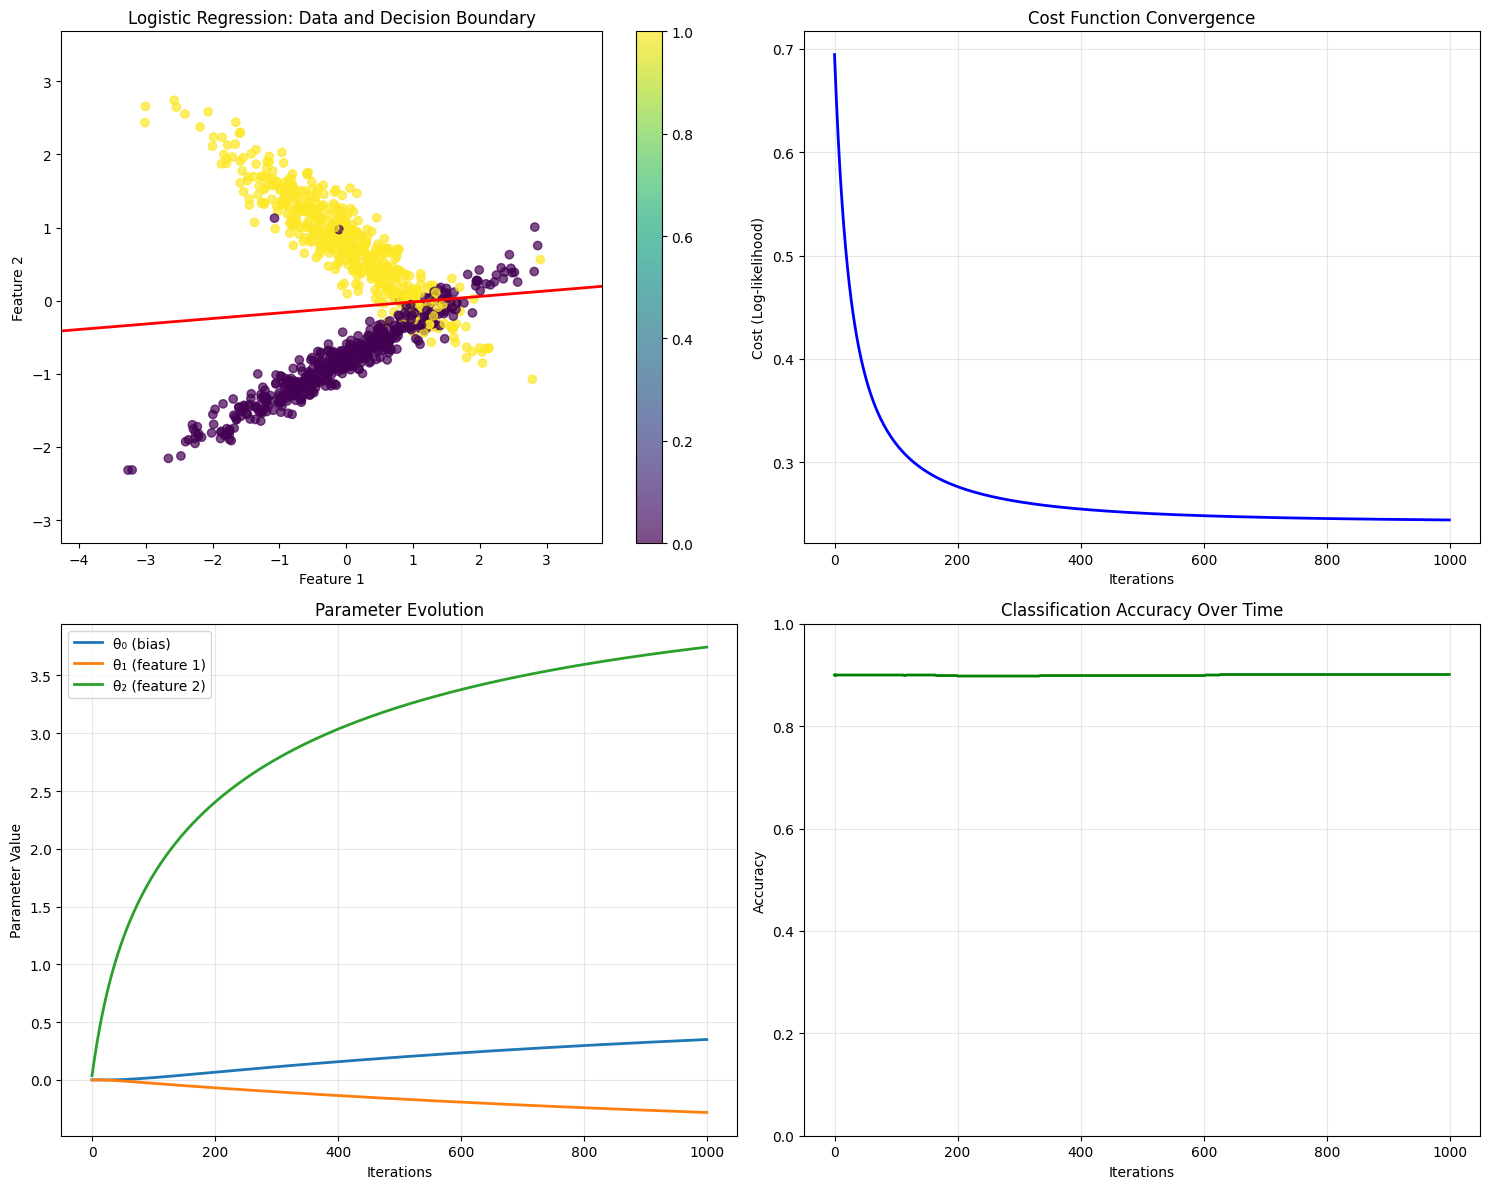


Final Results:
Final parameters: θ₀=0.3491, θ₁=-0.2824, θ₂=3.7456
Final cost: 0.244061
Final accuracy: 0.9010


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

def multivariate_gradient_descent_demo():
    # Generate classification dataset
    X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                             n_informative=2, n_clusters_per_class=1, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Add bias term
    X_with_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]
    
    # Sigmoid function
    def sigmoid(z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Clip to prevent overflow
    
    # Cost function (logistic regression)
    def cost_function(X, y, theta):
        m = len(y)
        z = X.dot(theta)
        h = sigmoid(z)
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        cost = -(1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
        return cost
    
    # Gradient computation
    def compute_gradient(X, y, theta):
        m = len(y)
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = (1/m) * X.T.dot(h - y)
        return gradient
    
    # Gradient descent implementation
    def gradient_descent_logistic(X, y, learning_rate, iterations):
        m, n = X.shape
        theta = np.random.normal(0, 0.01, n)  # Small random initialization
        cost_history = []
        theta_history = []
        
        for i in range(iterations):
            cost = cost_function(X, y, theta)
            gradient = compute_gradient(X, y, theta)
            theta = theta - learning_rate * gradient
            
            cost_history.append(cost)
            theta_history.append(theta.copy())
            
            # Print progress
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")
        
        return theta, cost_history, theta_history
    
    # Run gradient descent
    learning_rate = 0.1
    iterations = 1000
    
    print("Starting Multivariate Gradient Descent for Logistic Regression...")
    theta_final, cost_history, theta_history = gradient_descent_logistic(
        X_with_bias, y, learning_rate, iterations)
    
    # Create visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Data points and decision boundary
    scatter = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7)
    
    # Plot decision boundary
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    mesh_points = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
    Z = sigmoid(mesh_points.dot(theta_final))
    Z = Z.reshape(xx.shape)
    
    ax1.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Logistic Regression: Data and Decision Boundary')
    plt.colorbar(scatter, ax=ax1)
    
    # Plot 2: Cost function convergence
    ax2.plot(cost_history, color='blue', linewidth=2)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Cost (Log-likelihood)')
    ax2.set_title('Cost Function Convergence')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Parameter evolution
    theta_history = np.array(theta_history)
    ax3.plot(theta_history[:, 0], label='θ₀ (bias)', linewidth=2)
    ax3.plot(theta_history[:, 1], label='θ₁ (feature 1)', linewidth=2)
    ax3.plot(theta_history[:, 2], label='θ₂ (feature 2)', linewidth=2)
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Parameter Value')
    ax3.set_title('Parameter Evolution')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Accuracy over iterations
    accuracies = []
    for theta_iter in theta_history:
        predictions = sigmoid(X_with_bias.dot(theta_iter)) >= 0.5
        accuracy = np.mean(predictions == y)
        accuracies.append(accuracy)
    
    ax4.plot(accuracies, color='green', linewidth=2)
    ax4.set_xlabel('Iterations')
    ax4.set_ylabel('Accuracy')
    ax4.set_title('Classification Accuracy Over Time')
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim([0, 1])
    
    plt.tight_layout()
    plt.show()
    
    # Print final results
    final_accuracy = accuracies[-1]
    print(f"\nFinal Results:")
    print(f"Final parameters: θ₀={theta_final[0]:.4f}, θ₁={theta_final[1]:.4f}, θ₂={theta_final[2]:.4f}")
    print(f"Final cost: {cost_history[-1]:.6f}")
    print(f"Final accuracy: {final_accuracy:.4f}")
    
    return theta_final, cost_history, final_accuracy

# Run the multivariate example
final_theta, cost_hist, accuracy = multivariate_gradient_descent_demo()

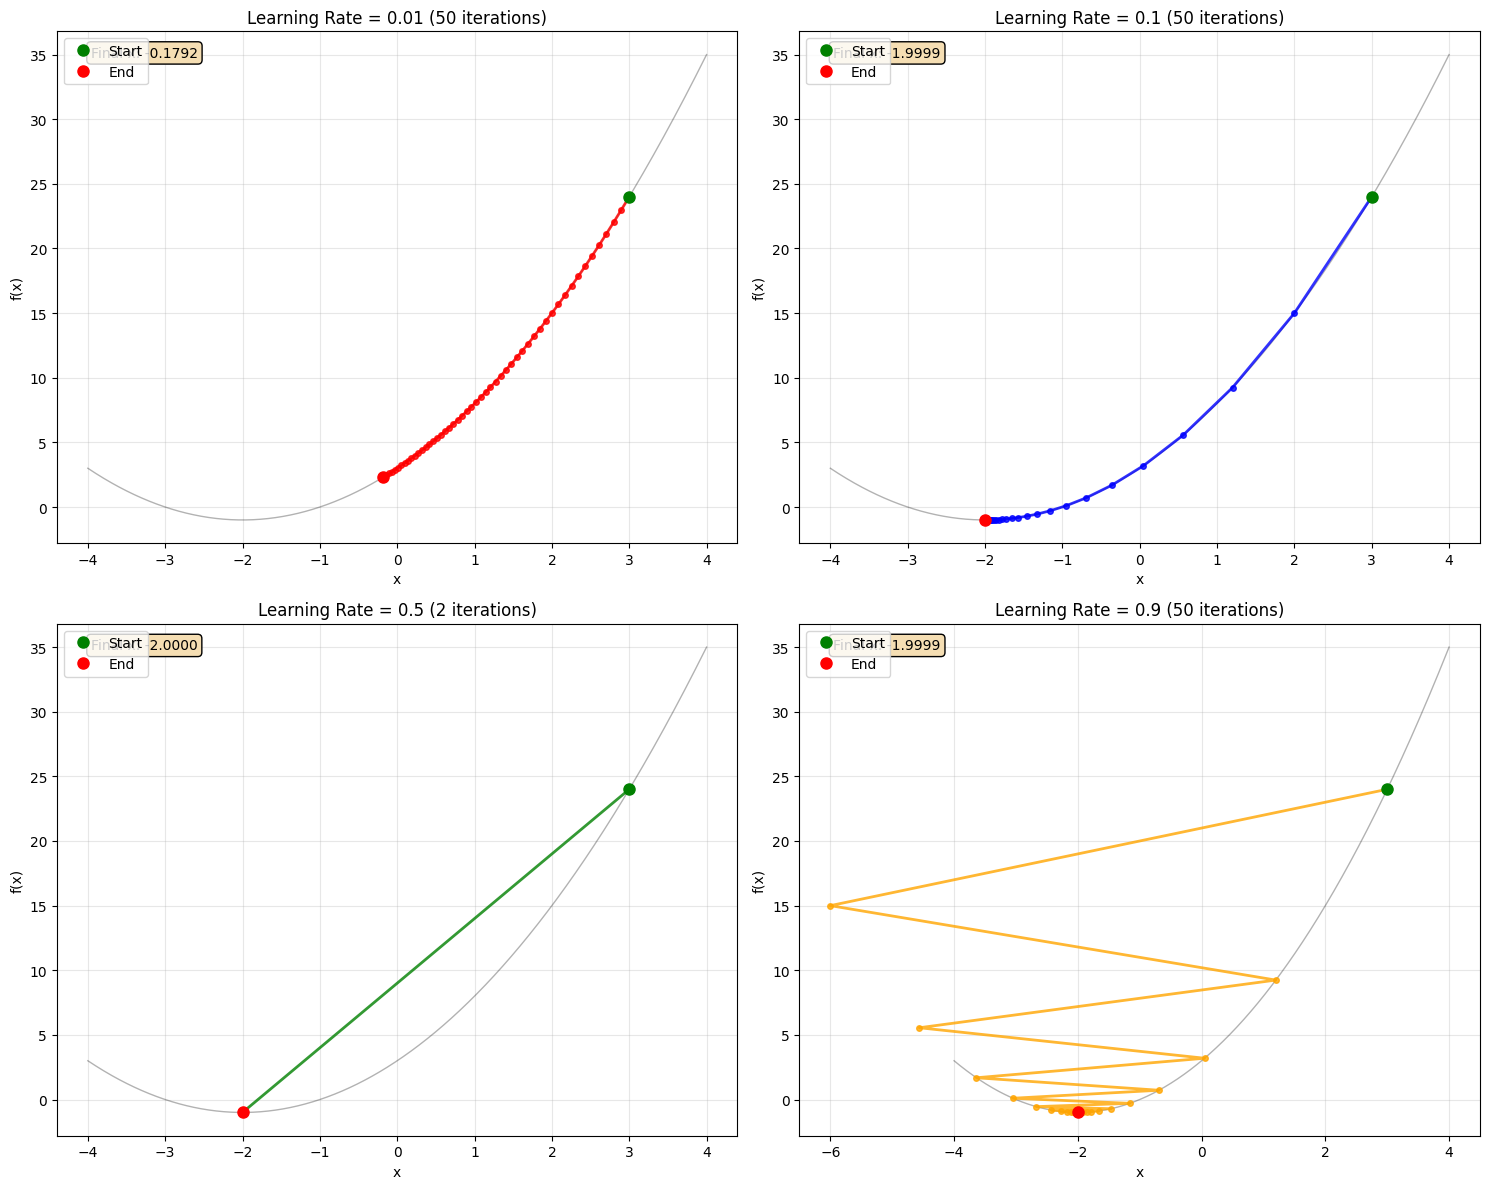

Learning Rate Comparison Summary:
--------------------------------------------------
LR = 0.01: Final x =  -0.1792, Iterations = 50
LR = 0.10: Final x =  -1.9999, Iterations = 50
LR = 0.50: Final x =  -2.0000, Iterations =  2
LR = 0.90: Final x =  -1.9999, Iterations = 50


In [7]:
def compare_learning_rates():
    # Simple quadratic function for demonstration
    def f(x):
        return x**2 + 4*x + 3
    
    def df_dx(x):
        return 2*x + 4
    
    # Gradient descent with different learning rates
    def gradient_descent_1d(start_x, learning_rate, iterations):
        x_history = [start_x]
        x = start_x
        
        for i in range(iterations):
            gradient = df_dx(x)
            x = x - learning_rate * gradient
            x_history.append(x)
            
            # Stop if converged
            if abs(gradient) < 1e-8:
                break
                
        return np.array(x_history)
    
    # Test different learning rates
    learning_rates = [0.01, 0.1, 0.5, 0.9]
    start_x = 3
    iterations = 50
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    axes = [ax1, ax2, ax3, ax4]
    
    # Plot function
    x_range = np.linspace(-4, 4, 1000)
    f_range = f(x_range)
    
    colors = ['red', 'blue', 'green', 'orange']
    
    for i, lr in enumerate(learning_rates):
        ax = axes[i]
        
        # Plot function
        ax.plot(x_range, f_range, 'k-', alpha=0.3, linewidth=1)
        
        # Run gradient descent
        x_history = gradient_descent_1d(start_x, lr, iterations)
        f_history = f(x_history)
        
        # Plot convergence path
        ax.plot(x_history, f_history, 'o-', color=colors[i], 
               linewidth=2, markersize=4, alpha=0.8)
        ax.plot(x_history[0], f_history[0], 'go', markersize=8, label='Start')
        ax.plot(x_history[-1], f_history[-1], 'ro', markersize=8, label='End')
        
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(f'Learning Rate = {lr} ({len(x_history)-1} iterations)')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Add text with final value
        ax.text(0.05, 0.95, f'Final x: {x_history[-1]:.4f}', 
               transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
    
    plt.tight_layout()
    plt.show()
    
    # Summary comparison
    print("Learning Rate Comparison Summary:")
    print("-" * 50)
    for i, lr in enumerate(learning_rates):
        x_history = gradient_descent_1d(start_x, lr, iterations)
        print(f"LR = {lr:4.2f}: Final x = {x_history[-1]:8.4f}, Iterations = {len(x_history)-1:2d}")

# Run the comparison
compare_learning_rates()

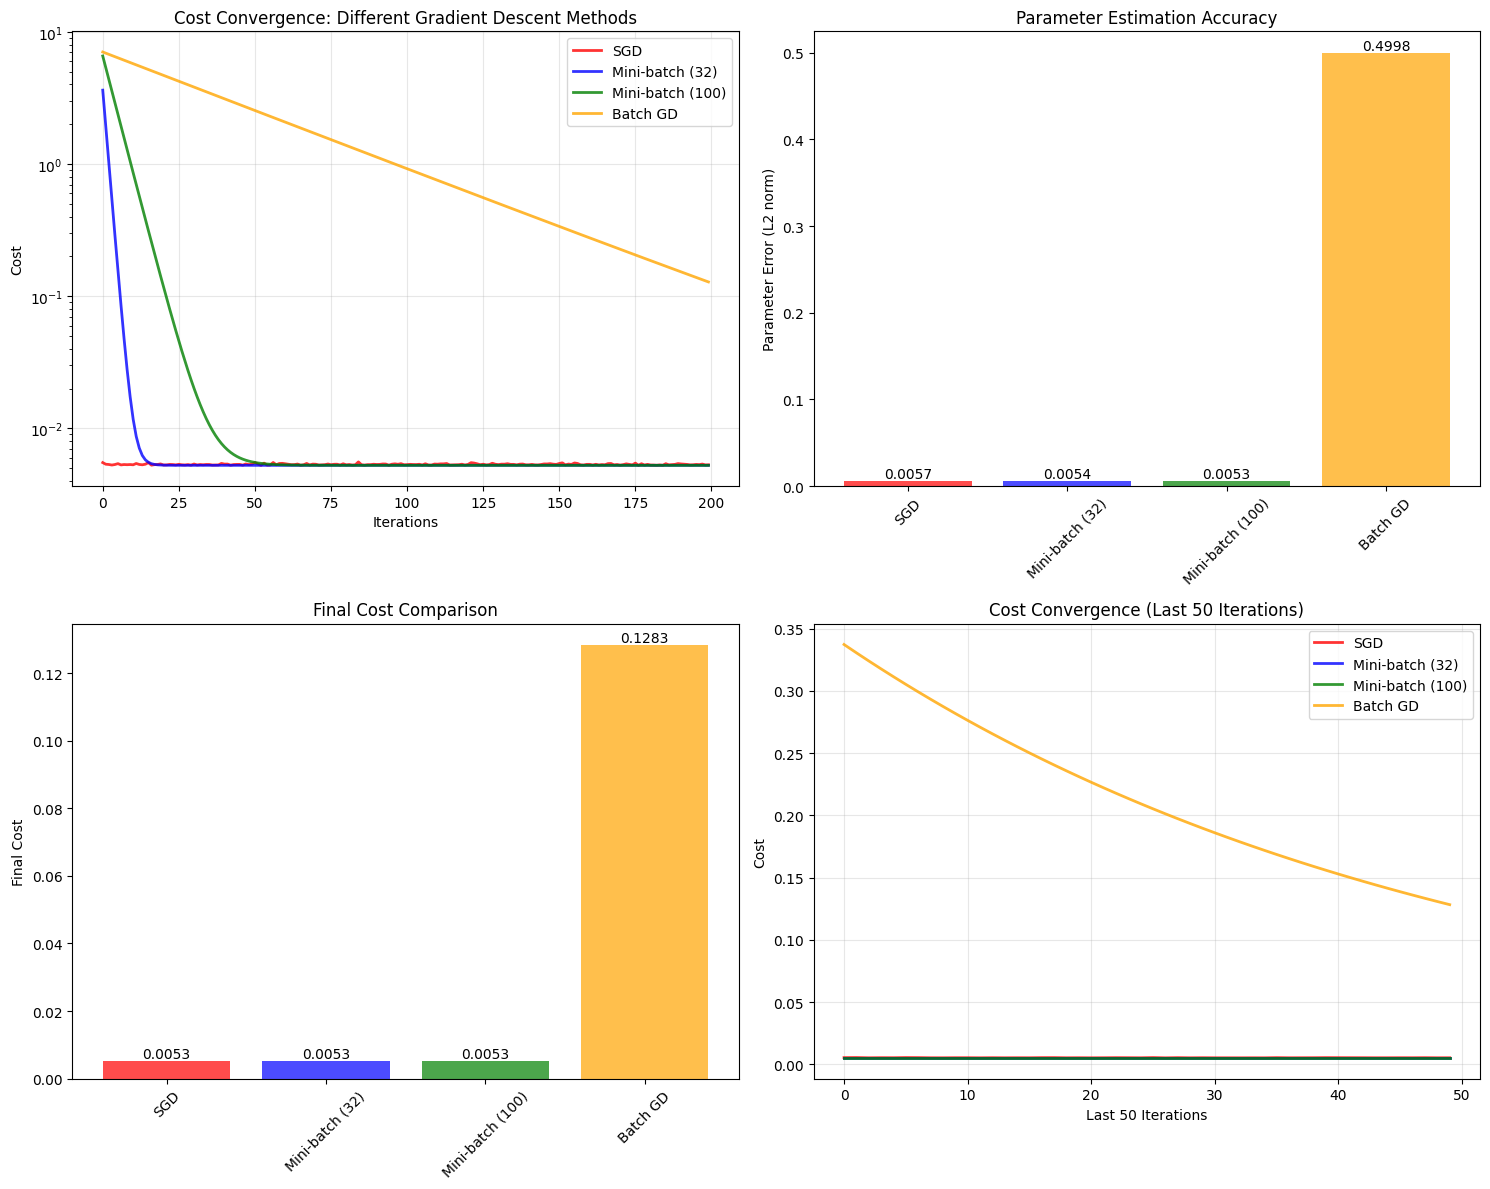

Mini-batch Gradient Descent Comparison
True parameters: [ 2.  -1.   0.5  3. ]
------------------------------------------------------------
SGD            : Final cost = 0.005308, Param error = 0.005708
                 Estimated params: [ 2.00445476 -0.9981686   0.50161367  3.00260394]

Mini-batch (32): Final cost = 0.005257, Param error = 0.005413
                 Estimated params: [ 1.99796733 -0.99829077  0.49736226  2.99608931]

Mini-batch (100): Final cost = 0.005257, Param error = 0.005301
                 Estimated params: [ 1.99817177 -0.99829753  0.49732843  2.9961629 ]

Batch GD       : Final cost = 0.128297, Param error = 0.499827
                 Estimated params: [ 1.76441837 -0.84182965  0.46943179  2.58966409]



In [8]:
def mini_batch_gradient_descent_demo():
    # Generate larger dataset
    np.random.seed(42)
    n_samples = 1000
    X = np.random.randn(n_samples, 3)  # 3 features
    true_theta = np.array([2, -1, 0.5, 3])  # True parameters including bias
    X_with_bias = np.c_[np.ones(n_samples), X]
    y = X_with_bias.dot(true_theta) + 0.1 * np.random.randn(n_samples)  # Add noise
    
    # Cost function
    def cost_function(X, y, theta):
        m = len(y)
        predictions = X.dot(theta)
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost
    
    # Batch gradient descent
    def batch_gradient_descent(X, y, learning_rate, iterations):
        m, n = X.shape
        theta = np.random.randn(n) * 0.1
        cost_history = []
        
        for i in range(iterations):
            predictions = X.dot(theta)
            theta = theta - (learning_rate/m) * X.T.dot(predictions - y)
            cost = cost_function(X, y, theta)
            cost_history.append(cost)
            
        return theta, cost_history
    
    # Mini-batch gradient descent
    def mini_batch_gradient_descent(X, y, learning_rate, iterations, batch_size):
        m, n = X.shape
        theta = np.random.randn(n) * 0.1
        cost_history = []
        
        for i in range(iterations):
            # Shuffle data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Process mini-batches
            for j in range(0, m, batch_size):
                end_idx = min(j + batch_size, m)
                X_batch = X_shuffled[j:end_idx]
                y_batch = y_shuffled[j:end_idx]
                
                predictions = X_batch.dot(theta)
                theta = theta - (learning_rate/batch_size) * X_batch.T.dot(predictions - y_batch)
            
            cost = cost_function(X, y, theta)
            cost_history.append(cost)
            
        return theta, cost_history
    
    # Stochastic gradient descent (batch_size = 1)
    def stochastic_gradient_descent(X, y, learning_rate, iterations):
        return mini_batch_gradient_descent(X, y, learning_rate, iterations, 1)
    
    # Parameters
    learning_rate = 0.01
    iterations = 200
    batch_sizes = [1, 32, 100, len(y)]  # SGD, Mini-batch, Mini-batch, Batch
    methods = ['SGD', 'Mini-batch (32)', 'Mini-batch (100)', 'Batch GD']
    
    # Run different methods
    results = []
    for i, batch_size in enumerate(batch_sizes):
        if batch_size == len(y):
            theta, cost_hist = batch_gradient_descent(X_with_bias, y, learning_rate, iterations)
        else:
            theta, cost_hist = mini_batch_gradient_descent(X_with_bias, y, learning_rate, iterations, batch_size)
        results.append((theta, cost_hist))
    
    # Visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    colors = ['red', 'blue', 'green', 'orange']
    
    # Plot 1: Cost convergence comparison
    for i, (theta, cost_hist) in enumerate(results):
        ax1.plot(cost_hist, color=colors[i], linewidth=2, label=methods[i], alpha=0.8)
    
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Cost')
    ax1.set_title('Cost Convergence: Different Gradient Descent Methods')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    # Plot 2: Parameter accuracy comparison
    param_errors = []
    for i, (theta, cost_hist) in enumerate(results):
        error = np.linalg.norm(theta - true_theta)
        param_errors.append(error)
    
    bars = ax2.bar(methods, param_errors, color=colors, alpha=0.7)
    ax2.set_ylabel('Parameter Error (L2 norm)')
    ax2.set_title('Parameter Estimation Accuracy')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, error in zip(bars, param_errors):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{error:.4f}', ha='center', va='bottom')
    
    # Plot 3: Final cost comparison
    final_costs = [cost_hist[-1] for _, cost_hist in results]
    bars = ax3.bar(methods, final_costs, color=colors, alpha=0.7)
    ax3.set_ylabel('Final Cost')
    ax3.set_title('Final Cost Comparison')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, cost in zip(bars, final_costs):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{cost:.4f}', ha='center', va='bottom')
    
    # Plot 4: Cost convergence (zoomed)
    for i, (theta, cost_hist) in enumerate(results):
        ax4.plot(cost_hist[-50:], color=colors[i], linewidth=2, label=methods[i], alpha=0.8)
    
    ax4.set_xlabel('Last 50 Iterations')
    ax4.set_ylabel('Cost')
    ax4.set_title('Cost Convergence (Last 50 Iterations)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("Mini-batch Gradient Descent Comparison")
    print("=" * 60)
    print(f"True parameters: {true_theta}")
    print("-" * 60)
    
    for i, method in enumerate(methods):
        theta, cost_hist = results[i]
        error = np.linalg.norm(theta - true_theta)
        print(f"{method:15s}: Final cost = {cost_hist[-1]:.6f}, "
              f"Param error = {error:.6f}")
        print(f"                 Estimated params: {theta}")
        print()

# Run the mini-batch demonstration
mini_batch_gradient_descent_demo()


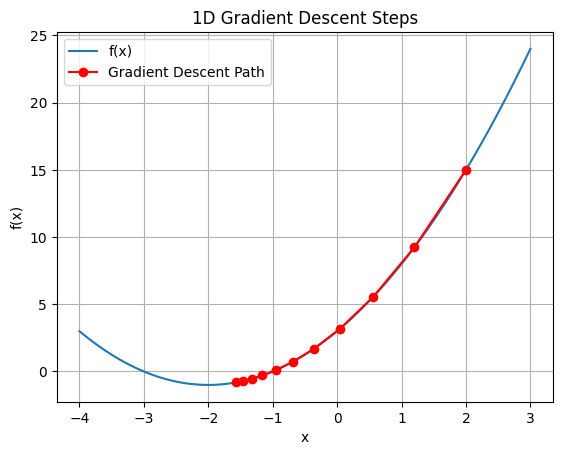

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2 + 4*x + 3

def df(x):
    return 2*x + 4

x_vals = [2]
alpha = 0.1

for i in range(10):
    x_new = x_vals[-1] - alpha * df(x_vals[-1])
    x_vals.append(x_new)

x = np.linspace(-4, 3, 100)
y = f(x)

plt.plot(x, y, label="f(x)")
plt.plot(x_vals, f(np.array(x_vals)), 'ro-', label="Gradient Descent Path")
plt.title("1D Gradient Descent Steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
